In [9]:
import io, os, sys, glob
import pandas as pd
import torchvision.transforms as T
from pathlib import Path
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt



In [36]:
def convert_image_to_rgb(image):
    return image.convert("RGB")

n_px=224,
norm_mean=(0.48145466, 0.4578275, 0.40821073)
norm_std=(0.26862954, 0.26130258, 0.27577711)

transforms = T.Compose(
        [
            T.RandomResizedCrop(
                size=n_px,
                scale=(0.7, 1.0),
                ratio=(0.75, 1.33),
                interpolation=T.InterpolationMode.BICUBIC,
            ),
            T.RandomVerticalFlip(p=0.5),
            T.RandomHorizontalFlip(p=0.3),
            # T.RandomApply(nn.ModuleList([T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1)]), p=0.5),
            convert_image_to_rgb,
            T.RandomApply(
                nn.ModuleList(
                    [
                        T.ColorJitter(
                            brightness=0.2,
                            contrast=0.2,
                            saturation=0.1,
                            hue=0.0,
                        )
                    ]
                ),
                p=1.0,
            ),
            # convert_image_to_rgb,
            T.ToTensor(),
            T.Normalize(norm_mean, norm_std),
        ]
    )

In [5]:
imgs = glob.glob('/data/archive/xwan/bt_pmd/pubmed/final_image/*')

In [31]:
type(image_t)

PIL.Image.Image

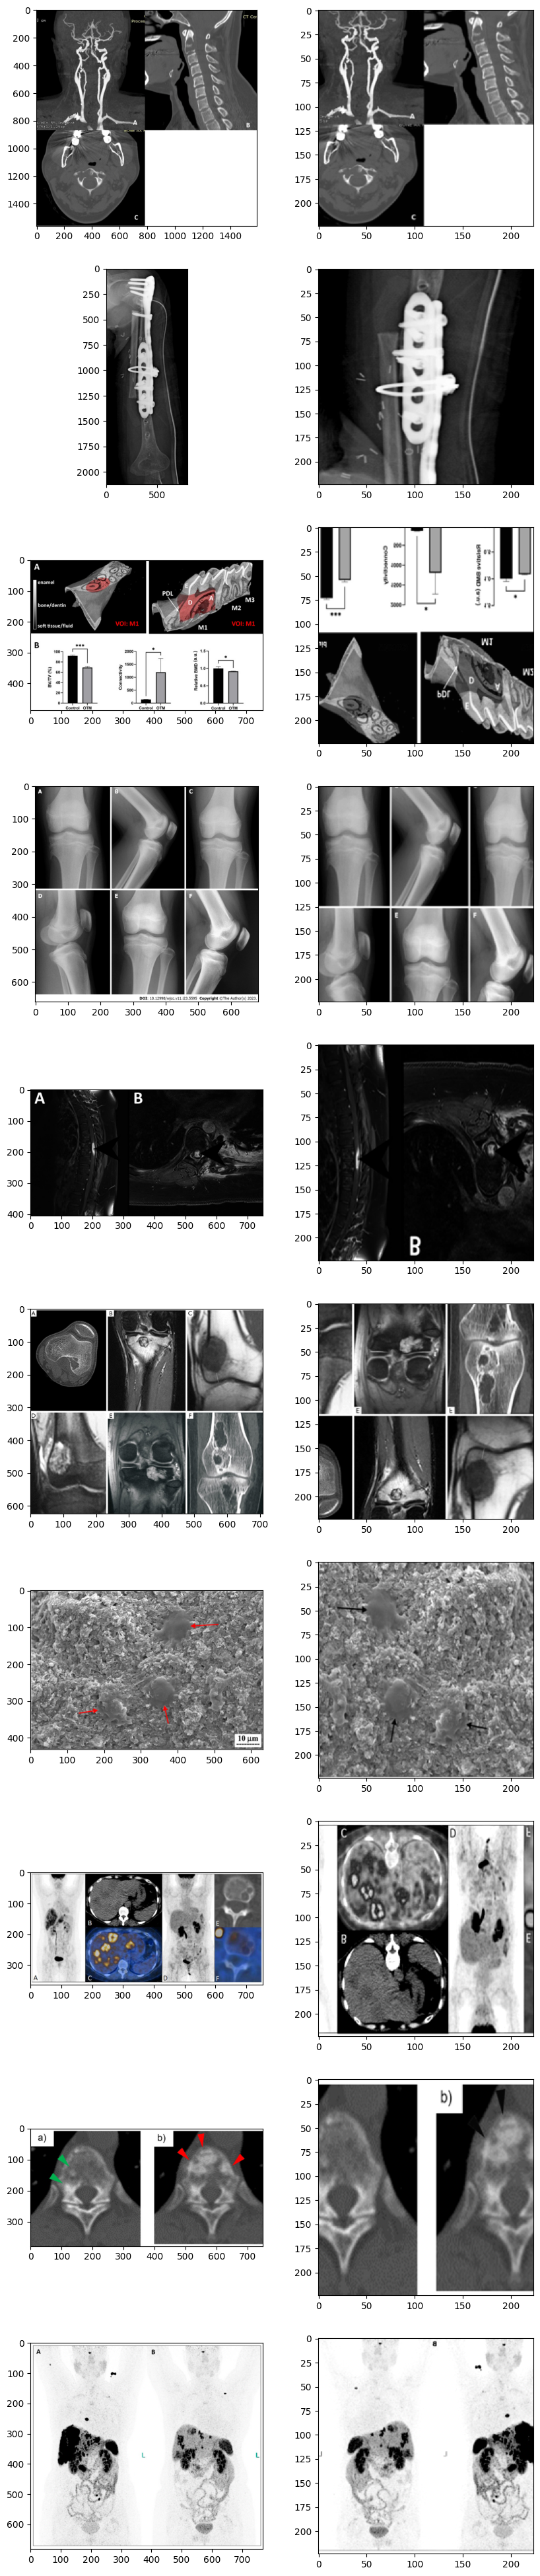

In [39]:
k = 10
fig, ax = plt.subplots(nrows=k, ncols=2, figsize=(10, 50))

for i in range(k):
    image = Image.open(imgs[i])
    image_t = transforms(image)
    ax[i, 0].imshow(image, cmap='gray')
    ax[i, 1].imshow(image_t[2], cmap='gray')

plt.show()

